In [ ]:
import os
import pickle
import datetime
from cedne import utils

In [2]:
today = str(datetime.datetime.now()).split(' ')[0]
outputDir = "Output/" + today + "/"
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

In [5]:
pickleDir = 'pickles/2025-08-01/'
genotypes = ['N2', 'inx-7-mutant', 'inx-7-rescue']
promoters = ['ncs-1', 'inx-4', 'glr-1', 'acr-5', 'inx-4+mbr-1', 'flp-3p+flp-7p+nmr-1p+sro-1p']
stimuli = ['OP-PA-OP', 'OP-Buffer-OP', 'Buffer-PA-Buffer', 'Buffer-Buffer-Buffer', 'OP-gacA-OP']
conditions = ['naive', 'trained']

wormDict = { genotype:{
                    promoter:{
                        stimulus: {
                            condition: {} for condition in conditions
                        } for stimulus in stimuli
                    } for promoter in promoters
                } for genotype in genotypes 
            }

for pf in os.listdir(pickleDir):
    # print(pf)
    if not pf.startswith('.'):
        genotype, promoter, stimulus, condition, *name = pf.split('_')
        if not all ([genotype in genotypes, promoter in promoters, stimulus in stimuli, condition in conditions]):
            print(pf, genotype in genotypes, promoter in promoters, stimulus in stimuli, condition in conditions, name)
        else:
            with open(pickleDir + pf, 'rb') as po:
                w = pickle.load(po)
                wormDict[genotype][promoter][stimulus][condition].update({w.name:w})

N2_odr-2(2b)+odr-2(18)p_Buffer-PA-Buffer_trained_20250409-ZC4164-trained-PA-Buffer-30s-worm002 True False True True ['20250409-ZC4164-trained-PA-Buffer-30s-worm002']
N2_odr-2(2b)+odr-2(18)p_Buffer-Buffer-Buffer_naive_20250324-ZC4164-naive-buffer-buffer-30s-worm02 True False True True ['20250324-ZC4164-naive-buffer-buffer-30s-worm02']
N2_odr-2(2b)+odr-2(18)p_Buffer-Buffer-Buffer_trained_odr-2(2b+18)-L1-trained-buffer-buffer-30s-worm003 True False True True ['odr-2(2b+18)-L1-trained-buffer-buffer-30s-worm003']
N2_odr-2(2b)+odr-2(18)p_Buffer-Buffer-Buffer_trained_odr-2(2b+18)-L1-trained-buffer-buffer-30s-worm004 True False True True ['odr-2(2b+18)-L1-trained-buffer-buffer-30s-worm004']
N2_odr-2(2b)+odr-2(18)p_OP-PA-OP_trained_20250423-ZC4164-trained-OP-PA-worm002 True False True True ['20250423-ZC4164-trained-OP-PA-worm002']
N2_odr-2(2b)+odr-2(18)p_Buffer-PA-Buffer_naive_20250423-ZC4164-naive-PA-Buffer-30s-worm002 True False True True ['20250423-ZC4164-naive-PA-Buffer-30s-worm002']
N2_odr

In [6]:
stimulus = 'OP-PA-OP'
condition = 'naive'
genotype = 'N2'

wormDict_promoter = {}
for genotype in genotypes:
    for promoter in wormDict[genotype]:
        print(promoter)
        if not promoter in wormDict_promoter:
            wormDict_promoter[promoter] = {}
        for stimulus in stimuli:
            for condition in wormDict[genotype][promoter][stimulus]:            
                w = wormDict[genotype][promoter][stimulus][condition]
                wormDict_promoter[promoter].update(w)


ncs-1
inx-4
glr-1
acr-5
inx-4+mbr-1
flp-3p+flp-7p+nmr-1p+sro-1p
ncs-1
inx-4
glr-1
acr-5
inx-4+mbr-1
flp-3p+flp-7p+nmr-1p+sro-1p
ncs-1
inx-4
glr-1
acr-5
inx-4+mbr-1
flp-3p+flp-7p+nmr-1p+sro-1p


In [7]:
w = utils.makeWorm()
nn_ori = w.networks["Neutral"]
promoter_neurons = {}
for promoter in wormDict_promoter:
    if promoter not in promoter_neurons:
        promoter_neurons[promoter] = []
    for w, worm in wormDict_promoter[promoter].items():
        for condition in worm.networks:
            nn = worm.networks[condition]
            for n in nn.neurons:
                if hasattr(nn.neurons[n], 'trial'):
                    if len(nn.neurons[n].trial.keys()):
                        if n+'L' in nn_ori.neurons:
                            promoter_neurons[promoter].append(n+'L')
                            promoter_neurons[promoter].append(n+'R')
                        elif n in nn_ori.neurons:
                            promoter_neurons[promoter].append(n)


In [8]:
# for promoter in promoter_neurons:
promoter_filter = promoters#['glr-1', 'ncs-1']
promoter_neurons = {promoter: list(set(promoter_neurons[promoter])) for promoter in promoter_neurons if len(promoter_neurons[promoter]) and promoter in promoter_filter}
promoter_list = [sorted(promoter_neurons[promoter]) for promoter in sorted(promoter_neurons)]

/Users/sahilmoza/Documents/Codes/CeDNe/.venv/lib/python3.11/site-packages/textalloc/__init__.py:487: UserWarning: Usage of allocate_text will be replaced with allocate in future releases, removing the need for the fig argument
  warnings.warn(


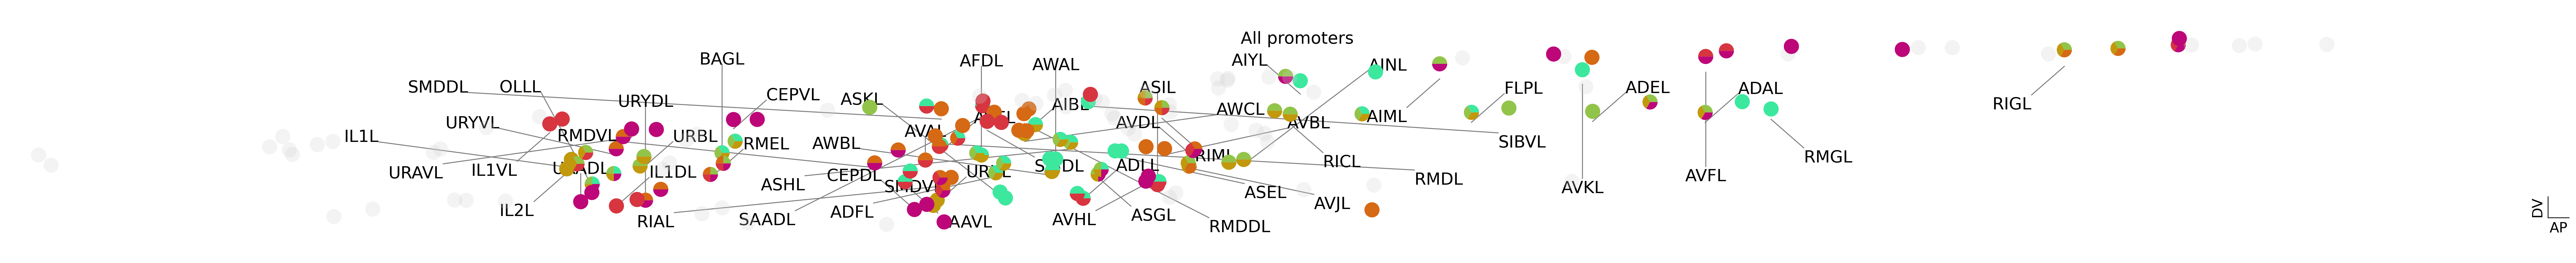

In [9]:
w = utils.makeWorm()
nn = w.networks["Neutral"]
idx = 3
proms = sorted(promoter_neurons)
utils.plot_position(nn_ori, highlight=promoter_list, axis='AP-DV', title="All promoters", save=outputDir + "position.svg", figsize=(36,3), label='left', limit={'AP':(0,130)}) # Possible combinations of axis: RL-AP, AP-LR, AP-DV, DV-LR, AP-RL, LR-DV, LR-AP, DV-AP